# Marketing Campaign Project

### Problem Scenario: ‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.

### Problem Objective: We'll perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.

### We'll test the following hypotheses:

- Older people are not as tech-savvy and probably prefer shopping in-store.
- Customers with kids probably have less time to visit a store and would prefer to shop online.
- Other distribution channels may cannibalize sales at the store.
- Does the US fare significantly better than the rest of the world in terms of total purchases?

### We'll use appropriate visualizations to help analyze the following:

- Which products are performing the best, and which are performing the least in terms of revenue?
- Is there any pattern between the age of customers and the last campaign acceptance rate?
- Which Country has the greatest number of customers who accepted the last campaign?
- Is there any pattern in the no. of children at home and total spend?
- Education background of the customers who complained in the last 2 years.

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, gaussian_kde, binom, poisson,norm,uniform

## We will first create a data frame from the csv containing the data

In [345]:
mdata = pd.read_csv('marketing_data.csv')
print(mdata.head(10))
print(mdata.columns)

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   
5   7348        1958         PhD         Single  $71,691.00         0   
6   4073        1954    2n Cycle        Married  $63,564.00         0   
7   1991        1967  Graduation       Together  $44,931.00         0   
8   4047        1954         PhD        Married  $65,324.00         0   
9   9477        1954         PhD        Married  $65,324.00         0   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...         

## Then we'll ensure that the data is clean and that there is no missing or incorrect data
## Inspecting the data manually by looking at the csv file we can see that sthe Income colum has some cells empty

In [346]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### We can see from the info method that the 'Income' column has only 2216 non-null count. 
### Since the dataframe contains 2240 rows, the 'Income' column is missing 22 entries
### We'll do further exploration of each column to detect any issues with the data in those columns
### This is the strategy for checking validity of the data:
- We will check to make sure there are no duplicate rows
- We need to make sure that information that needs to be unique has no duplicates i.e. Customer ID
- For Year of Birth we'll make sure that the number entered is a valid year (not in the future or 0 or too far into the past)
- For Education, Marital Status,  we'll make sure all entries correspond to a logical category
- For income we know we are missing data
- Dt_Customer, we'll mke sure we've got valid dates
- For Country we'll get a list of all unique values
- For the rest of the numerical columns we'll get list of unique values

In [347]:
# Check for duplicates
duplicate_rows = mdata[mdata.duplicated()]
if duplicate_rows.empty:
    print('No duplicate rows found')
else:
    print(duplicate_rows)
    
print()

# Check for duplicate IDs
duplicate_ids = mdata[mdata['ID'].duplicated()]
if duplicate_ids.empty:
    print('No duplicate IDs found')
else:
    print(duplicate_ids)
    
print()


# Check unique values for Year of Birth
print("These are the unique values for Year of Birth")
print(mdata['Year_Birth'].unique())

print()

# Add new column for Age to the original dataset
mdata['Age'] = pd.to_datetime(mdata['Dt_Customer'],format="%m/%d/%y").dt.year - mdata['Year_Birth']

# Check Year of Birth outliers
outliers = mdata[mdata['Age'] > 100]
print('These are the Age outliers in the dataset')
print(outliers)
print()


# Check unique values for Education
print(mdata['Education'].value_counts())

print()

# Check unique values for Marital Status
print(mdata['Marital_Status'].value_counts())

print()

# Check the outlier marital status categories of 'Absurd', 'Yolo' and 'Alone'
outlier_marital_status = mdata[(mdata['Marital_Status'] == 'Absurd') | (mdata['Marital_Status'] == 'YOLO') | (mdata['Marital_Status'] == 'Alone')]
# outlier marita status ages
print('These are the Marital status outliers in the dataset')
print(outlier_marital_status)
print()


#Check missing values
print('Columns with Count of Missing values')
print(mdata.isnull().sum())
print()
# Print rows with missing values
missing_income_rows = mdata[mdata[' Income '].isnull()]
print('Rows with missing Income values')
print(mdata[mdata.isnull().any(axis=1)])
print()

#Check Country Unique values
print(mdata['Country'].value_counts())
print()

# Check kidhom and all other numerical columns for valid values
unique_values_in_numerical_columns = {col:set() for col in mdata.select_dtypes(include=[np.number]).columns}
for index,row in mdata.iterrows():
    for col in unique_values_in_numerical_columns:
        unique_values_in_numerical_columns[col].add(row[col])
        
#print unique values in numerical columns except ID
for col in unique_values_in_numerical_columns:
    if col != 'ID':
        print(f'{col}: Min-Max: {min(unique_values_in_numerical_columns[col])} - {max(unique_values_in_numerical_columns[col])}')
        print()
        


No duplicate rows found

No duplicate IDs found

These are the unique values for Year of Birth
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]

These are the Age outliers in the dataset
         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
513   11004        1893  2n Cycle         Single  $60,182.00         0   
827    1150        1899       PhD       Together  $83,532.00         0   
2233   7829        1900  2n Cycle       Divorced  $36,640.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
513          1     5/17/14       23         8  ...                  4   
827          0     9/26/13       36       755  ...                  1   
2233         0     9/26/13       99        15

## Given the data exploration above we have identified the following issues:

- There are 7 rows with marital status categories that are not valid categories, i.e. "YOLO", "Alone", "Absurd"
- There are 3 rows with a Birth Year of 1900 or less, making their ages over 110 years of age
- There are 24 rows with missing income

## Suggested Resolution of these issues:

- For Marital status, since in this project, marital status is not factoring into any of our proposed hypotheses, we will leave them as they are
- For the Birth Year issue, we'll run multiple scenarios to see how it affects our conclusions: 1. deleting the 3 rows, 2. imputating the data by using median age, 3. using 1st quartile mean age 4. using 3rd quartile mean age 5. assigning to each outlier the mean age of the income quartile in which the income of the outlier falls
- For the 24 rows of missing income, we'll imputate the missing values by looking at education and marital status and assume that the customers with similar education and marital status make the same yearly income, on average.

## Birth Year mean without any modifications to original dataset

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64


<Axes: ylabel='Frequency'>

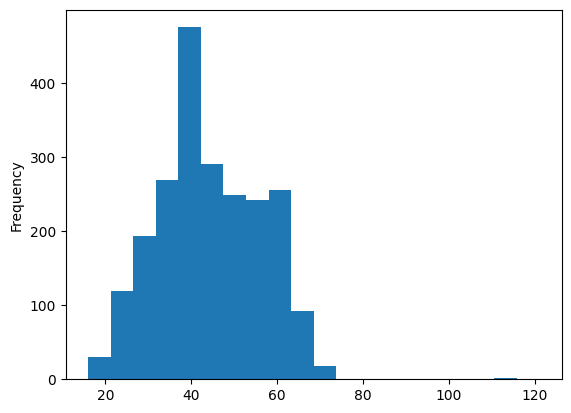

In [348]:
print(mdata['Age'].describe())
mdata['Age'].plot(kind='hist',bins=20)

## Birth Year Removal of Outliers

count    2237.000000
mean       44.126062
std        11.739008
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


<Axes: >

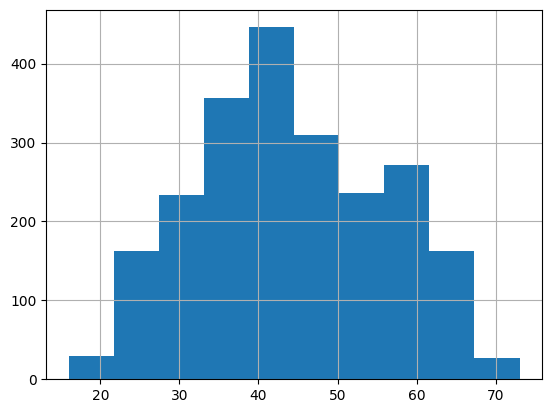

In [349]:
mdata_no_age_outliers = mdata.copy()
mdata_no_age_outliers = mdata[mdata['Age'] <= 100]
print(mdata_no_age_outliers['Age'].describe())
mdata_no_age_outliers['Age'].hist()

## Birth Year Imputations - using mean age

count    2240.000000
mean       44.125893
std        11.731142
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


<Axes: >

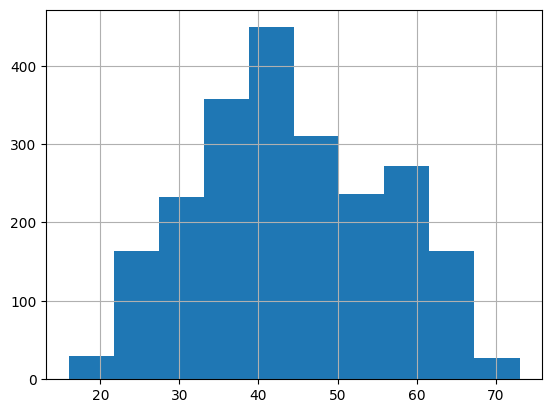

In [350]:
mdata_age_outliers_to_mean = mdata.copy()
mdata_age_outliers_to_mean.loc[mdata_age_outliers_to_mean['Age'] > 100, 'Age'] = int(mdata['Age'].mean())
print(mdata_age_outliers_to_mean['Age'].describe())
mdata_age_outliers_to_mean['Age'].hist()


## Birth Year Imputations - using 1st quartile mean age

count    2240.000000
mean       44.115179
std        11.734907
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


<Axes: >

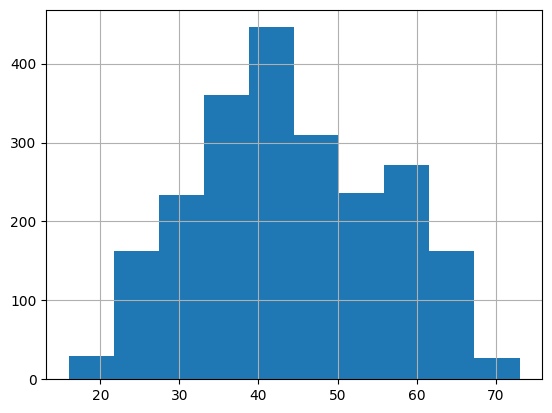

In [351]:
mdata_age_outliers_to_1st_quartile = mdata.copy()
mdata_age_outliers_to_1st_quartile.loc[mdata_age_outliers_to_1st_quartile['Age'] > 100, 'Age'] = int(mdata['Age'].quantile(0.25))
print(mdata_age_outliers_to_1st_quartile['Age'].describe())
mdata_age_outliers_to_1st_quartile['Age'].hist()

## Birth Year Imputations  - using 3rd quartile mean age

count    2240.000000
mean       44.139286
std        11.736700
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


<Axes: >

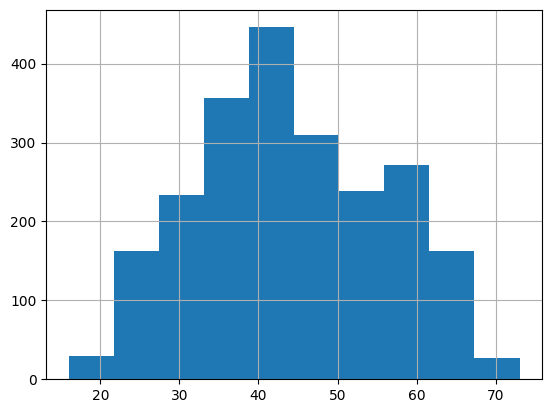

In [352]:
mdata_age_outliers_to_3rd_quartile = mdata.copy()
mdata_age_outliers_to_3rd_quartile.loc[mdata_age_outliers_to_3rd_quartile['Age'] > 100, 'Age'] = int(mdata['Age'].quantile(0.75))
print(mdata_age_outliers_to_3rd_quartile['Age'].describe())
mdata_age_outliers_to_3rd_quartile['Age'].hist()

## Plot Age distribution


count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64


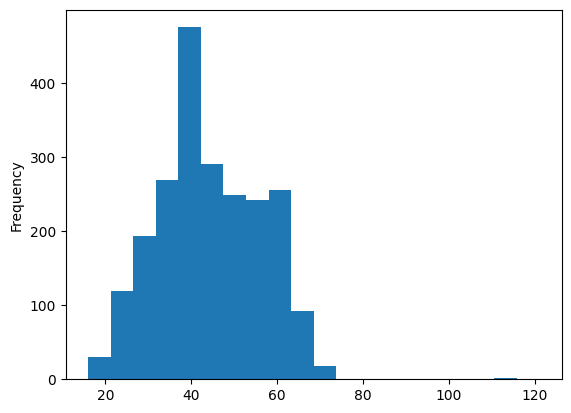

In [353]:
# Plot of the ages distribution of the customers    
mdata['Age'].plot(kind='hist',bins=20)
print()
print(mdata['Age'].describe()) 

## Using the income quartile mean that comes closes to the income for each of the 3 age outliers

In [354]:

# Change income to float, can only be run once
mdata[' Income ']=mdata[' Income '].str.replace('$','').str.replace(',','').astype(float) 

# Replace missing values with 0
mdata[' Income '] = mdata[' Income '].fillna(0)

# Calcualte the quartiles for income
quartiles = mdata[' Income '].quantile([0.25,0.5,0.75])
print(quartiles)
print(mdata[' Income '].info())
print()
print(outliers)

# Calculate the mean income for each quartile
mean_income_1st_quartile = mdata[mdata[' Income '] <= quartiles[0.25]][' Income '].mean()
mean_income_2nd_quartile = mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])][' Income '].mean()
mean_income_3rd_quartile = mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])][' Income '].mean()
mean_income_4th_quartile = mdata[mdata[' Income '] > quartiles[0.75]][' Income '].mean()

# Store the means in a dictionary
quartile_means = {'q1':mean_income_1st_quartile, 'q2':mean_income_2nd_quartile, 'q3':mean_income_3rd_quartile, 'q4':mean_income_4th_quartile}

#Function to find closest quartile baed on income
def closest_quartile(income,quartile_means):
    closest_q = min(quartile_means, key=lambda x:abs(quartile_means[x]-income))
    return closest_q
print(' WHAT THE FUCK')
# Itaration over age outliers and assign to closest quartile
for index, row in mdata[mdata['Age']>100].iterrows():
    income=row[' Income ']
    closest_q=closest_quartile(income,quartile_means)
    print()
    print('closest_q: ',closest_q)
    
    if closest_q == 'q1':
        mdata.at[index, 'Age']=int(mdata[mdata[' Income '] <= quartiles[0.25]]['Age'].mean())
    elif closest_q == 'q2':
        mdata.at[index, 'Age']=int(mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])]['Age'].mean())
    elif closest_q == 'q3':
        mdata.at[index, 'Age']=int(mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])]['Age'].mean())
    elif closest_q == 'q4':
        mdata.at[index, 'Age']=int(mdata[mdata[' Income '] > quartiles[0.75]]['Age'].mean())
    
    print(mdata.loc[index])
    print()
    print(mdata['Age'].describe())
    

0.25    34722.00
0.50    51075.00
0.75    68289.75
Name:  Income , dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name:  Income 
Non-Null Count  Dtype  
--------------  -----  
2240 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB
None

         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
513   11004        1893  2n Cycle         Single  $60,182.00         0   
827    1150        1899       PhD       Together  $83,532.00         0   
2233   7829        1900  2n Cycle       Divorced  $36,640.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
513          1     5/17/14       23         8  ...                  4   
827          0     9/26/13       36       755  ...                  1   
2233         0     9/26/13       99        15  ...                  5   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
513              0             0     

<Axes: ylabel='Frequency'>

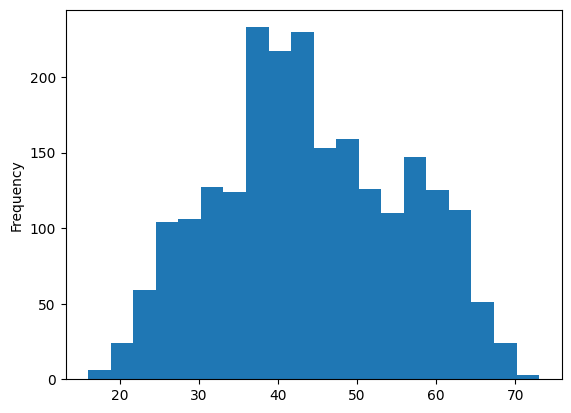

In [326]:
# Plot of the ages distribution of the customers    
mdata['Age'].plot(kind='hist',bins=20)

## Given the distribution of the customer ages, we can see that the outliers consist of a very small percentage 3/2240= 0.13%
## Given that small percentage of age outliers, we'll investigate the implications of deleting these rows.


Mean:  52247.25135379061
Median:  51381.5
Min:  1730.0 Max:  666666.0
1st quartile:  35303.0 2nd quartile:  51381.5 3rd quartile:  68522.0
Inter Quartile Range:  33219.0

Outliers
         ID  Year_Birth   Education Marital_Status   Income   Kidhome  \
142   10089        1974  Graduation       Divorced  102692.0        0   
210    4619        1945         PhD         Single  113734.0        0   
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
832    4611        1970  Graduation       Together  105471.0        0   
853    5336        1971      Master       Together  157733.0        1   
1244   2798        1977         PhD       Together  102160.0        0   
1564   7215        1983  Graduation         Single  101970.0        0   
1826   5555      

<Axes: ylabel='Frequency'>

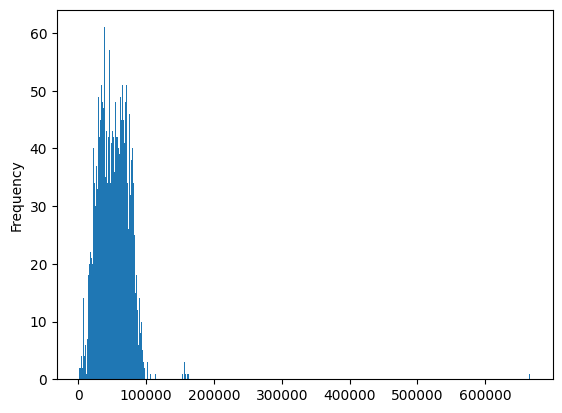

In [167]:
# Change the income column dtype to float ******* CAN ONLY BE RUN ONCE
# mdata[' Income '] = mdata[' Income '].str.replace('$','').str.replace(',','').astype(float)
# Plot of the income distribution of the customers
print('Mean: ',mdata[' Income '].mean())
print('Median: ',mdata[' Income '].median())
print('Min: ',mdata[' Income '].min(),'Max: ',mdata[' Income '].max())
q1= mdata[' Income '].quantile(0.25)
q2= mdata[' Income '].quantile(0.5)
q3= mdata[' Income '].quantile(0.75)
print('1st quartile: ',q1,'2nd quartile: ',q2,'3rd quartile: ',q3)
iqr=q3-q1
print('Inter Quartile Range: ',iqr)
print()
print('Outliers')
print(mdata[(mdata[' Income '] < q1 - 1.5*iqr) | (mdata[' Income '] > q3 + 1*iqr)])
print()
mdata[' Income '].plot(kind='hist',bins=500)




In [183]:
income_threshold = mdata[' Income '].quantile(0.99)

In [184]:
print(income_threshold)

94458.79999999999


In [185]:
# Full dataset analysis
full_dataset_metrics = mdata.groupby('Country')[' Income '].sum()


In [186]:
print(full_dataset_metrics)

Country
AUS     7615230.0
CA     14111464.0
GER     6142327.0
IND     7205413.0
ME       173041.0
SA     18477985.0
SP     56360083.0
US      5694366.0
Name:  Income , dtype: float64
